# Clustering with Sklearn

In [42]:
from ipywidgets import *
import matplotlib.pyplot as plt
plt.style.use('default')
from matplotlib.widgets import Slider
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


from sklearn import datasets
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [43]:
def interactive_plot(func):
    interact(func, 
             x = widgets.IntSlider(value=0, min=0, max=180, step=1), 
             y = widgets.IntSlider(value=0, min=0, max=180, step=1)
            )

## Iris dataset

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/1920px-Iris_versicolor_3.jpg" height="300" width="300" align="left"/> &nbsp; <i>Iris versicolor</i>

### Clustering with KMeans

In [44]:
iris = datasets.load_iris()
features = iris.data
cluster = KMeans(n_clusters=3, random_state=0, n_jobs=-1)
model = cluster.fit(features)
labels = model.labels_

In [45]:
def plot_iris(x=0,y=0):
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=x, azim=y)

    ax.scatter(features[:, 3], 
               features[:, 0], 
               features[:, 2], 
               c=labels.astype(np.float), 
               edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.dist = 12

In [46]:
interactive_plot(plot_iris)

interactive(children=(IntSlider(value=0, description='x', max=180), IntSlider(value=0, description='y', max=18…

### Dimensionality Reduction with TSNE and PCA


<img src="https://miro.medium.com/max/1400/1*vfLvJF8wHaQjDaWv6Mab2w.png" height="300" width="300" align="left"/> &nbsp; &nbsp; &nbsp; &nbsp; PCA


In [6]:
X_tsne = TSNE(learning_rate=100).fit_transform(iris.data)
X_pca = PCA().fit_transform(iris.data)

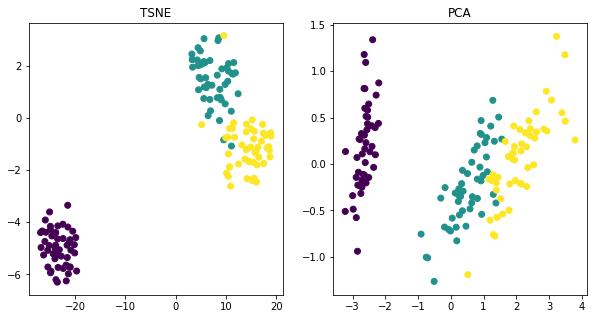

In [7]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris.target)
plt.title("TSNE")
plt.subplot(122)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)
plt.title("PCA")
plt.show()

## 20 Newsgroups with T-SNE

In [8]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups = fetch_20newsgroups(subset="train", categories=categories)
vectors = TfidfVectorizer().fit_transform(newsgroups.data)

In [9]:
X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(vectors)

In [10]:
X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2034 samples in 0.004s...
[t-SNE] Computed neighbors for 2034 samples in 0.515s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2034
[t-SNE] Computed conditional probabilities for sample 2000 / 2034
[t-SNE] Computed conditional probabilities for sample 2034 / 2034
[t-SNE] Mean sigma: 0.107856
[t-SNE] Computed conditional probabilities in 0.110s
[t-SNE] Iteration 50: error = 73.7900543, gradient norm = 0.0999859 (50 iterations in 1.975s)
[t-SNE] Iteration 100: error = 73.5826645, gradient norm = 0.0943219 (50 iterations in 2.578s)
[t-SNE] Iteration 150: error = 73.9356461, gradient norm = 0.0971823 (50 iterations in 1.915s)
[t-SNE] Iteration 200: error = 73.4412613, gradient norm = 0.0983215 (50 iterations in 1.593s)
[t-SNE] Iteration 250: error = 73.7225342, gradient norm = 0.0946618 (50 iterations in 1.313s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.722534
[t-SNE] Iteration 300: err

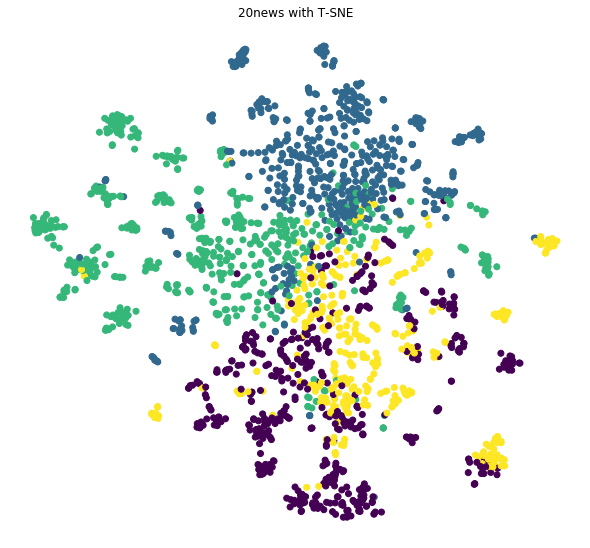

In [11]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(frameon=False)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1],c=newsgroups.target, marker="o")
plt.title("20news with T-SNE")
plt.show()

## Small Wiki Dataset

In [12]:
import pandas as pd

In [13]:
corpus = pd.read_csv("corpora/german_wiki_small.csv")
corpus.head(2)

,category,length,text,textlength
0,Computerspiel nach Plattform,184,"SWIV ist ein Shoot ' em up von Storm , erschie...",184
1,Computerspiel nach Plattform,342,Slayer ist ein Action-Rollenspiel des Entwickl...,342


In [14]:
labels = LabelEncoder().fit_transform(corpus["category"])
#reshaping labels
labels = labels.reshape(labels.shape[0])
features  = TfidfVectorizer().fit_transform(corpus["text"])

cluster = KMeans(n_clusters=3, random_state=0, n_jobs=-1)
model = cluster.fit(features)

#### Dimensionality Reduction

In [15]:
# Dimensionality Reduction: Truncated SVD
X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(features)

# Dimensionality Reduction: T-SNE
X_embedded = TSNE(n_components=2, perplexity=40, verbose=0).fit_transform(X_reduced)

#### Visualizing single parts of the documents

In [16]:
def plot_wiki(x, y):
    fig = plt.figure(figsize=(5,5))
    ax = plt.axes(frameon=False)
    plt.setp(ax, xticks=(), yticks=())
    plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,wspace=0.0, hspace=0.0)
    plt.scatter(np.squeeze(np.asarray(features[:, x].todense())), 
                np.squeeze(np.asarray(features[:, y].todense())),
                                      c=labels.astype(np.float), marker="o")
    plt.title("Small wiki dataset with T-SNE (single parts)")
    plt.show()

In [17]:
interactive_plot(plot_wiki)

interactive(children=(IntSlider(value=0, description='x', max=180), IntSlider(value=0, description='y', max=18…

#### Visualizing reduced parts
See <a href="https://nbviewer.jupyter.org/urls/gist.githubusercontent.com/AlexanderFabisch/1a0c648de22eff4a2a3e/raw/59d5bc5ed8f8bfd9ff1f7faa749d1b095aa97d5a/t-SNE.ipynb">link</a>.

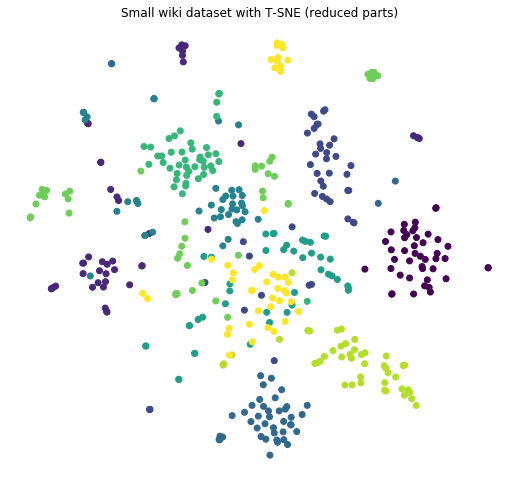

In [18]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes(frameon=False)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9, wspace=0.0, hspace=0.0)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels.astype(np.float), marker="o")
plt.title("Small wiki dataset with T-SNE (reduced parts)")
plt.show()

#### Visualization with Yellowbrick

In [19]:
from yellowbrick.text import TSNEVisualizer
from yellowbrick.text import UMAPVisualizer
#from yellowbrick.text.tsne import tsne
from yellowbrick.style import set_palette
set_palette('paired')
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

##### TSNE

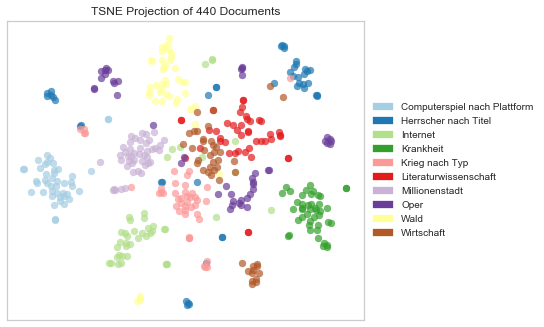

In [20]:
tsne = TSNEVisualizer(decompose_byint=100)
tsne.fit(features, corpus["category"])
tsne.show()

##### UMAP

/Users/jan/.local/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 11000. The TBB threading layer is disabled.
  warnings.warn(problem)


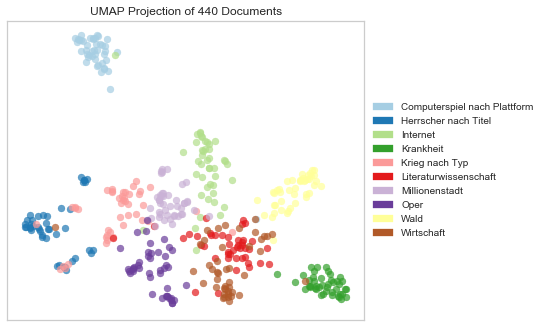

In [21]:
umap = UMAPVisualizer()
umap.fit(features, corpus["category"])
umap.show()